# **Задание: Прогнозирование качества вин**

Вы будете работать с набором данных о качестве вин, который содержит характеристики различных вин и оценки их качества. Ваша задача — создать модель, которая будет предсказывать качество вина на основе его свойств. Используйте библиотеки Pandas, NumPy и scikit-learn.

## **Шаги выполнения задания:**

**1.Загрузка и предварительная обработка данных:**

Загрузите уникальный набор данных о качестве вин, например, Wine Quality Data Set с сайта UCI Machine Learning Repository.

Проведите исследовательский анализ данных: изучите распределение значений, найдите и обработайте пропуски и выбросы. 

Нормализуйте данные, если это необходимо.

**2.Разработка модели:**

Используйте метод передачи через нейронную сеть (например, Feedforward Neural Network) для предсказания качества вина. 

Опишите, как вы реализуете обучение с помощью градиентного спуска и какие функции активации будете использовать.

Обучите модель на подготовленных данных и оцените её эффективность, используя метрики, такие как R² (коэффициент детерминации) и MAE (Mean Absolute Error).

**3.Отчет и визуализация:**

Подготовьте отчет с описанием всех этапов работы, включая код и графики. 

Используйте Matplotlib или Seaborn для визуализации результатов.

Включите график, который показывает зависимость предсказанных оценок от истинных значений, и обсудите, какие выводы можно сделать на основе этой визуализации. 

Также, предложите улучшения для вашей модели.

## **0. Установка и импорт библиотек**

In [ ]:
#!pip install scikit-learn pandas matplotlib seaborn

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

## **1. Загрузка данных**

In [2]:
df = pd.read_csv('data/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **2. EDA**

Выведем основные статистики

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Из основных статистик видно наличие выбросов либо аномалий, которые обработаем ниже

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
df.loc[:, df.isna().sum() > 0].isna().sum()

Series([], dtype: float64)

Пропуски отсутствуют.

Посмотрим на распределение и выбросы наших переменных

In [37]:
# Функция построения статистик по переменным
def stats_graf(data):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
    ax1.hist(data, bins=20)
    ax2.boxplot(data)
    plt.show()

# Функция для исправления выбросов
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

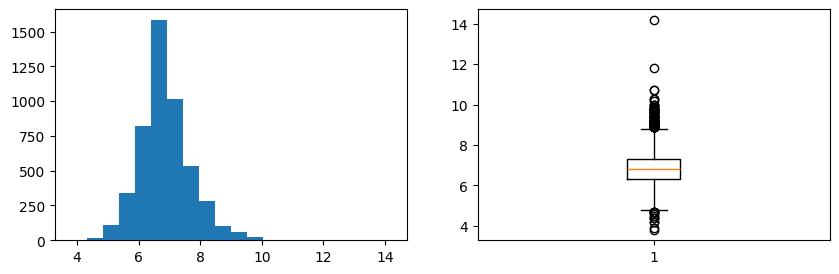

In [38]:
stats_graf(df['fixed acidity'])

Переменная 'fixed acidity' имеет распределение похожее на нормальное. Имеются выбросы, скорректируем их.

In [51]:
boundaries = calculate_outliers(df['fixed acidity'])
df.loc[df['fixed acidity'] < boundaries[0], 'fixed acidity'] = boundaries[0]
df.loc[df['fixed acidity'] > boundaries[1], 'fixed acidity'] = boundaries[1]

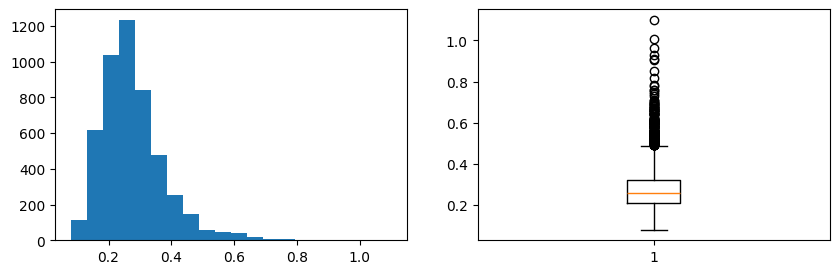

In [45]:
stats_graf(df['volatile acidity'])

Переменная 'volatile acidity' имеет распределение похожее на логнормальное. Имеются выбросы, скорректируем их.

In [53]:
boundaries = calculate_outliers(df['volatile acidity'])
df.loc[df['volatile acidity'] < boundaries[0], 'volatile acidity'] = boundaries[0]
df.loc[df['volatile acidity'] > boundaries[1], 'volatile acidity'] = boundaries[1]

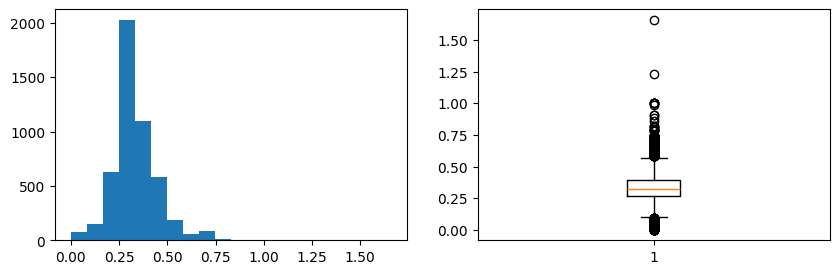

In [48]:
stats_graf(df['citric acid'])

Переменная 'citric acid' имеет распределение похожее на нормальное. Имеются выбросы, скорректируем их.

In [54]:
boundaries = calculate_outliers(df['citric acid'])
df.loc[df['citric acid'] < boundaries[0], 'citric acid'] = boundaries[0]
df.loc[df['citric acid'] > boundaries[1], 'citric acid'] = boundaries[1]

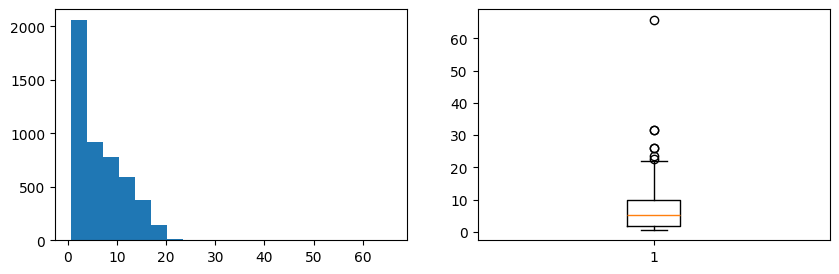

In [56]:
stats_graf(df['residual sugar'])

У переменной 'residual sugar' имеются выбросы, скорректируем их.

In [60]:
boundaries = calculate_outliers(df['residual sugar'])
df.loc[df['residual sugar'] < boundaries[0], 'residual sugar'] = boundaries[0]
df.loc[df['residual sugar'] > boundaries[1], 'residual sugar'] = boundaries[1]

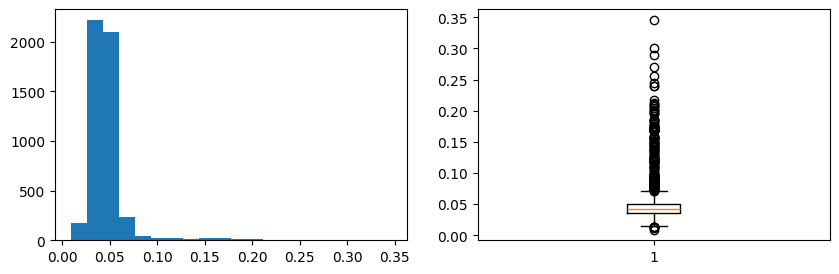

In [59]:
stats_graf(df['chlorides'])

У переменной 'chlorides' имеются выбросы, скорректируем их.

In [61]:
boundaries = calculate_outliers(df['chlorides'])
df.loc[df['chlorides'] < boundaries[0], 'chlorides'] = boundaries[0]
df.loc[df['chlorides'] > boundaries[1], 'chlorides'] = boundaries[1]

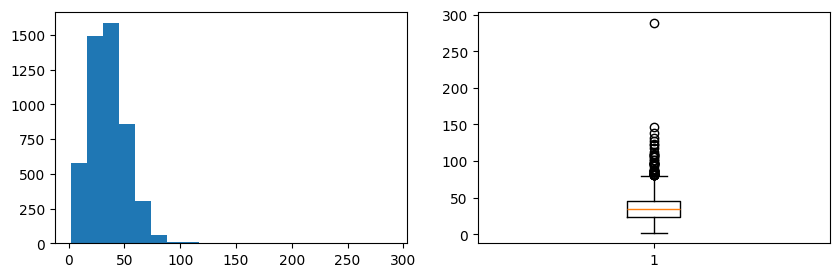

In [63]:
stats_graf(df['free sulfur dioxide'])

Переменная 'free sulfur dioxide' имеет распределение похожее на логнормальное. Имеются выбросы, скорректируем их.

In [64]:
boundaries = calculate_outliers(df['free sulfur dioxide'])
df.loc[df['free sulfur dioxide'] < boundaries[0], 'free sulfur dioxide'] = boundaries[0]
df.loc[df['free sulfur dioxide'] > boundaries[1], 'free sulfur dioxide'] = boundaries[1]

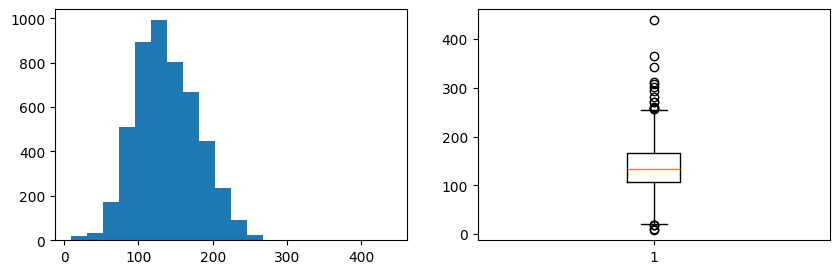

In [66]:
stats_graf(df['total sulfur dioxide'])

Переменная 'total sulfur dioxide' имеет распределение похожее на логнормальное. Имеются выбросы, скорректируем их.

In [67]:
boundaries = calculate_outliers(df['total sulfur dioxide'])
df.loc[df['total sulfur dioxide'] < boundaries[0], 'total sulfur dioxide'] = boundaries[0]
df.loc[df['total sulfur dioxide'] > boundaries[1], 'total sulfur dioxide'] = boundaries[1]

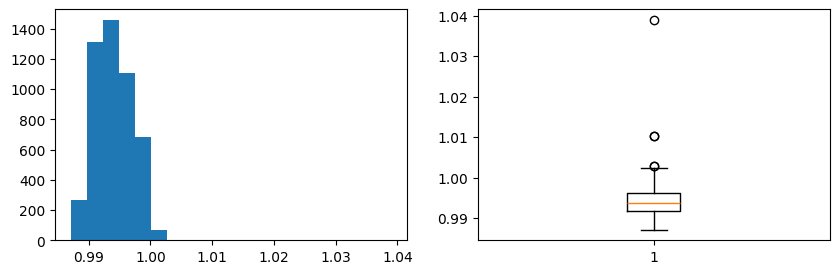

In [69]:
stats_graf(df['density'])

У переменной 'density' имеются выбросы, скорректируем их.

In [70]:
boundaries = calculate_outliers(df['density'])
df.loc[df['density'] < boundaries[0], 'density'] = boundaries[0]
df.loc[df['density'] > boundaries[1], 'density'] = boundaries[1]

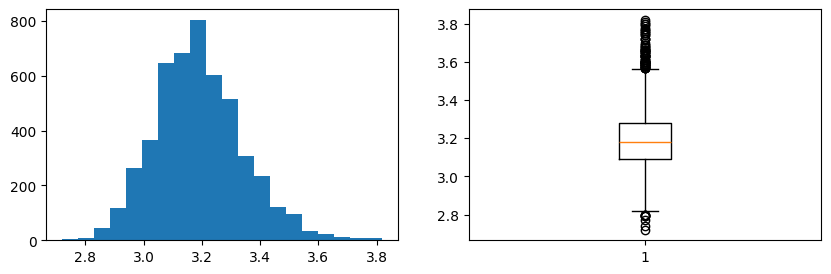

In [72]:
stats_graf(df['pH'])

Переменная 'pH' имеет распределение похожее на нормальное. Имеются выбросы, скорректируем их.

In [73]:
boundaries = calculate_outliers(df['pH'])
df.loc[df['pH'] < boundaries[0], 'pH'] = boundaries[0]
df.loc[df['pH'] > boundaries[1], 'pH'] = boundaries[1]

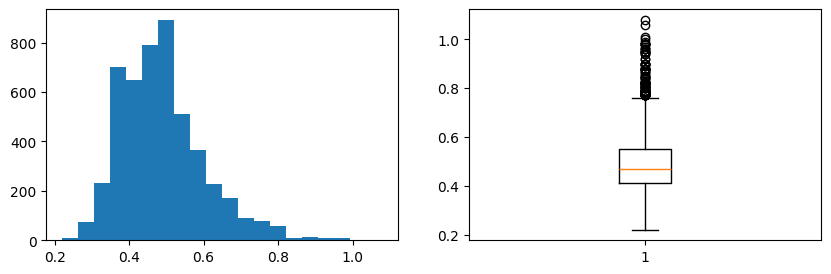

In [75]:
stats_graf(df['sulphates'])

Переменная 'sulphates' имеет распределение похожее на логнормальное. Имеются выбросы, скорректируем их.

In [76]:
boundaries = calculate_outliers(df['sulphates'])
df.loc[df['sulphates'] < boundaries[0], 'sulphates'] = boundaries[0]
df.loc[df['sulphates'] > boundaries[1], 'sulphates'] = boundaries[1]

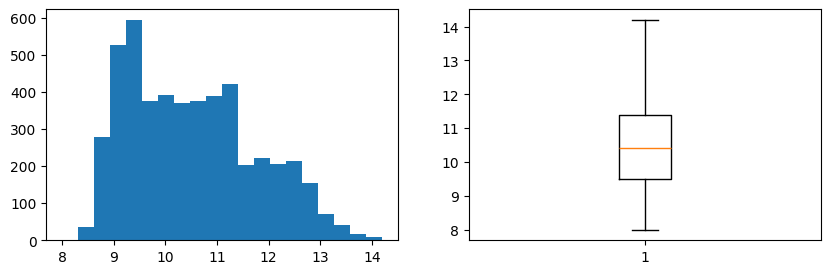

In [78]:
stats_graf(df['alcohol'])

У алкоголя выбросы отсутствуют, что не может не вызвать восхищения

Посмотрим на распределение целевой переменной

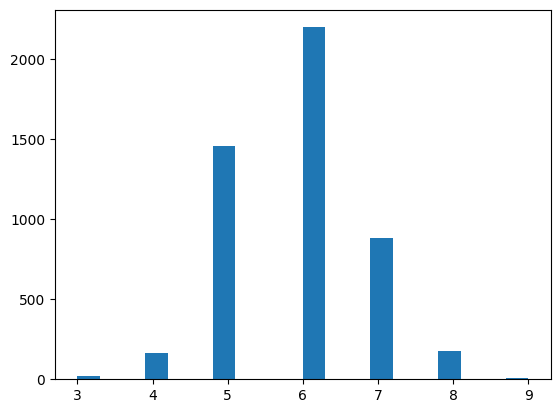

In [84]:
plt.hist(df.quality, bins=20)
plt.show()

In [85]:
df.quality.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

**С учетом того, что целевая переменная носит скорее дискретный характер, чем непрерывный, на мой взгляд правильнее было бы решать задачу многоклассовой классификации, а не регрессии.**

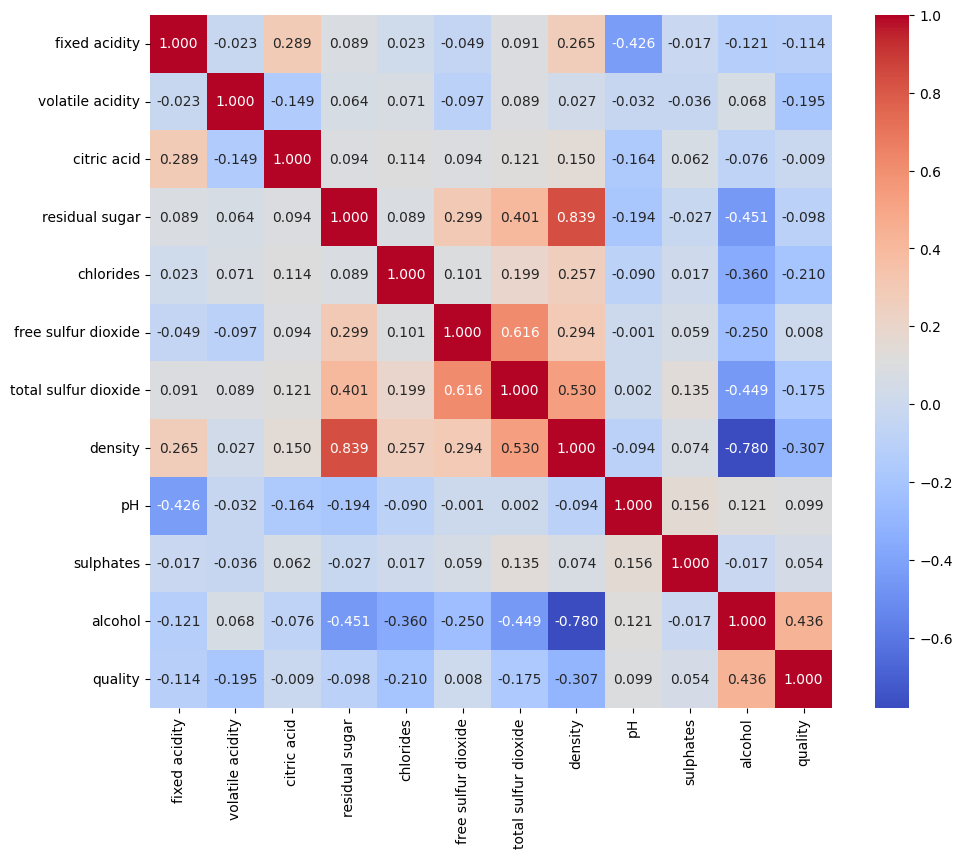

In [6]:
plt.figure(figsize=(11, 9))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='coolwarm')
plt.show()

**Как видно из тепловой карты корреляции, несколько переменных имеют коэффициент корреляции более 0,7 по модулю, таким образом, это может свидетельствовать о мультиколлинеарности. С учетом того, что переменная density имеет сильную корреляцию с другими переменными, то для улучшения качества модели данную переменную можно удалить, либо использовать ее для создания синтетических переменных. Соответственно, удаление только одной переменной density может избавить нас от мультиколлинеарности.**

## **3. Feature engineering**

Стандартизируем переменные

In [91]:
columns_to_scaler = df.columns.tolist()[:11]
std = StandardScaler()
df[columns_to_scaler] = std.fit_transform(df[columns_to_scaler])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.195806,0.147195,0.287973,2.875236,0.131934,0.618390,0.757168,2.399966,-1.271226,-0.350931,-1.393152,6
1,-0.680790,0.487246,0.094728,-0.958805,0.486120,-1.318331,-0.148568,-0.005749,0.767042,0.020714,-0.824276,6
2,1.573315,0.260545,0.674462,0.105091,0.574667,-0.318733,-0.982799,0.372291,0.495273,-0.443842,-0.336667,6
3,0.446262,-0.306205,-0.098516,0.426267,1.283039,0.743340,1.138530,0.544128,0.019677,-0.815487,-0.499203,6
4,0.446262,-0.306205,-0.098516,0.426267,1.283039,0.743340,1.138530,0.544128,0.019677,-0.815487,-0.499203,6


## **4. Modeling**

### **Опишите, как вы реализуете обучение с помощью градиентного спуска и какие функции активации будете использовать.**

1. Вначале у нейросети инициализируются веса и смещения случайным образом.
2. Затем сигнал передается через слои с обработкой функцией активации.
3. На выходном слое происходит вычисление разницы между предсказанием и значениями целевой переменной, а затем через обратное распространение ошибки происходит корректировка весов сети (back propagation).
4. После обновления всех весов нейросети считается, что завершена 1 эпоха обучения и происходит повторение всех описанных действий на последующих эпохах.

На нейронах скрытых слоев как правило используется функция активации Relu, т.к. она проста в реализации и обладает хорошими харатеристиками для обучения нейросетей.
На выходном слое в задаче регрессии как правило используется линейная функции активации.

In [99]:
X = df.drop(['quality'], axis=1)
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **4.1. BaseLine**

In [101]:
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
pred_mlp_train = mlp.predict(X_train)
pred_mlp_test = mlp.predict(X_test)
print(f'Метрика MAE MLPRegressor на тренировочной выборке: {mean_absolute_error(y_train, pred_mlp_train):.4f}')
print(f'Метрика MAE MLPRegressor на тестовой выборке: {mean_absolute_error(y_test, pred_mlp_test):.4f}')
print(f'Метрика R2 MLPRegressor на тренировочной выборке: {r2_score(y_train, pred_mlp_train):.4f}')
print(f'Метрика R2 MLPRegressor на тестовой выборке: {r2_score(y_test, pred_mlp_test):.4f}')

Метрика MAE MLPRegressor на тренировочной выборке: 0.4942
Метрика MAE MLPRegressor на тестовой выборке: 0.5496
Метрика R2 MLPRegressor на тренировочной выборке: 0.4842
Метрика R2 MLPRegressor на тестовой выборке: 0.3611


C:\Users\Alex\anaconda3\envs\test\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **4.2. Tuning**

Попробуем немного потюнить нашу модель, чтоб посмотреть на изменение метрик

In [105]:
mlp = MLPRegressor(random_state=42, hidden_layer_sizes=(100, 20))
mlp.fit(X_train, y_train)
pred_mlp_train = mlp.predict(X_train)
pred_mlp_test = mlp.predict(X_test)
print(f'Метрика MAE MLPRegressor на тренировочной выборке: {mean_absolute_error(y_train, pred_mlp_train):.4f}')
print(f'Метрика MAE MLPRegressor на тестовой выборке: {mean_absolute_error(y_test, pred_mlp_test):.4f}')
print(f'Метрика R2 MLPRegressor на тренировочной выборке: {r2_score(y_train, pred_mlp_train):.4f}')
print(f'Метрика R2 MLPRegressor на тестовой выборке: {r2_score(y_test, pred_mlp_test):.4f}')

Метрика MAE MLPRegressor на тренировочной выборке: 0.4473
Метрика MAE MLPRegressor на тестовой выборке: 0.5459
Метрика R2 MLPRegressor на тренировочной выборке: 0.5800
Метрика R2 MLPRegressor на тестовой выборке: 0.3611


C:\Users\Alex\anaconda3\envs\test\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
mlp = MLPRegressor(random_state=42, max_iter=500)
mlp.fit(X_train, y_train)
pred_mlp_train = mlp.predict(X_train)
pred_mlp_test = mlp.predict(X_test)
print(f'Метрика MAE MLPRegressor на тренировочной выборке: {mean_absolute_error(y_train, pred_mlp_train):.4f}')
print(f'Метрика MAE MLPRegressor на тестовой выборке: {mean_absolute_error(y_test, pred_mlp_test):.4f}')
print(f'Метрика R2 MLPRegressor на тренировочной выборке: {r2_score(y_train, pred_mlp_train):.4f}')
print(f'Метрика R2 MLPRegressor на тестовой выборке: {r2_score(y_test, pred_mlp_test):.4f}')

Метрика MAE MLPRegressor на тренировочной выборке: 0.4501
Метрика MAE MLPRegressor на тестовой выборке: 0.5475
Метрика R2 MLPRegressor на тренировочной выборке: 0.5731
Метрика R2 MLPRegressor на тестовой выборке: 0.3525


Как видим увеличение слоев и количества итераций приводят к переобучению модели.

Обучим модель MLPRegressor с параметрами по умолчанию на всех данных и выведем график зависимости целевой переменной от предсказания

In [112]:
model = MLPRegressor(random_state=42)
model.fit(X, y)
pred_model = model.predict(X)
print(f'Метрика MAE MLPRegressor: {mean_absolute_error(y, pred_model):.4f}')
print(f'Метрика R2 MLPRegressor: {r2_score(y, pred_model):.4f}')

Метрика MAE MLPRegressor: 0.4973
Метрика R2 MLPRegressor: 0.4826


C:\Users\Alex\anaconda3\envs\test\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


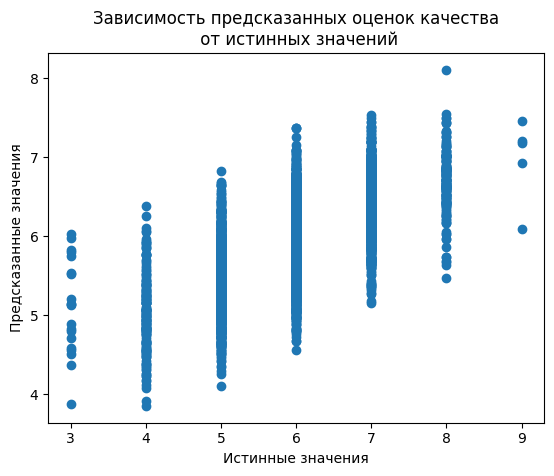

In [117]:
plt.scatter(y, pred_model)
plt.title('Зависимость предсказанных оценок качества\n от истинных значений')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.show()

## **5. Выводы**

Кроме метрик корректность построенной модели регрессии оценивается по наличию гомоскедастичности (постоянство дисперсии). Однако по полученному графику трудно оценить наличие гомо- либо гетероскедастичности, т.к. в нашем случае целевая переменная представляет собой дискретные значения, а не непрерывные.

Для улучшения качества и корректности нашей модели нужно:

1. Решать задачу многоклассовой классификации, а не регрессии. По причине несбалансированности классов в качестве метрики использовать гармоническое среднее (f1-score);

2. Решить проблему мультиколлинеарности;

3. Попробовать сгенерировать новые переменные либо преобразовать имеющиеся, например прологарифмировать переменные с логнормальным распределением;

4. Использовать другую модель машинного обучения, например - градиентный бустинг.